In [ ]:
# !pip install cleanlab

In [ ]:
# %%capture

# !wget -nc 'https://cleanlab-public.s3.amazonaws.com/ObjectDetectionBenchmarking/tutorial_obj/predictions.pkl'
# !wget -nc 'https://cleanlab-public.s3.amazonaws.com/ObjectDetectionBenchmarking/tutorial_obj/labels.pkl'
# !wget -nc 'https://cleanlab-public.s3.amazonaws.com/ObjectDetectionBenchmarking/tutorial_obj/example_images.zip' && unzip -q -o example_images.zip

In [1]:
import pickle
from cleanlab.object_detection.filter import find_label_issues
from cleanlab.object_detection.rank import (
    _separate_label,
    _separate_prediction,
    get_label_quality_scores,
    issues_from_scores,
)
from cleanlab.object_detection.summary import visualize

In [2]:
IMAGE_PATH = './example_images/'  # path to raw image files downloaded above
predictions = pickle.load(open("predictions.pkl", "rb"))
labels = pickle.load(open("labels.pkl", "rb"))

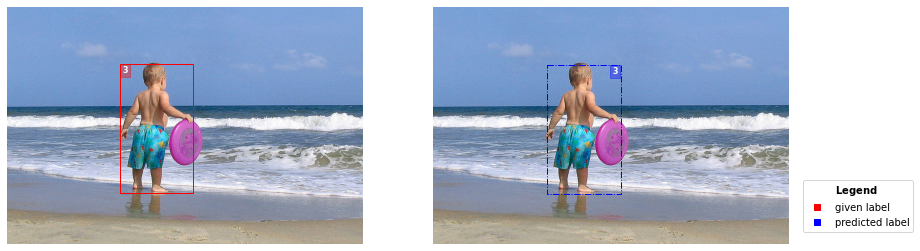

In [3]:
image_to_visualize = 8  # change this to view other images
image_path = IMAGE_PATH + labels[image_to_visualize]['seg_map']
visualize(image_path, label=labels[image_to_visualize], prediction=predictions[image_to_visualize], overlay=False)

In [4]:
len(labels)

118

In [8]:
labels[0]

{'bboxes': array([[ 42.68,  39.85, 209.8 , 113.56],
        [  0.  ,  64.19,  46.14, 105.23]], dtype=float32),
 'labels': array([0, 0]),
 'bboxes_ignore': array([], shape=(0, 4), dtype=float32),
 'masks': [[[71.38,
    40.34,
    63.36,
    44.72,
    47.79,
    61.5,
    45.36,
    67.83,
    42.68,
    85.83,
    42.92,
    96.29,
    50.71,
    96.53,
    53.14,
    99.21,
    55.82,
    105.53,
    58.01,
    109.43,
    60.92,
    110.16,
    65.3,
    110.16,
    69.44,
    109.18,
    74.79,
    102.13,
    103.49,
    103.83,
    103.49,
    107.97,
    107.14,
    111.62,
    114.68,
    111.13,
    117.85,
    108.94,
    120.77,
    102.86,
    130.25,
    105.29,
    131.71,
    109.18,
    135.12,
    112.34,
    141.2,
    113.56,
    147.28,
    111.62,
    150.2,
    105.05,
    162.61,
    105.53,
    176.72,
    106.51,
    178.91,
    97.26,
    188.15,
    93.86,
    197.88,
    94.1,
    204.45,
    95.8,
    209.8,
    97.99,
    209.8,
    88.26,
    205.91,
    

In [6]:
len(predictions)

118

In [9]:
predictions

[array([array([[ 43.48734   ,  43.30025   , 207.36551   , 112.19279   ,
                  0.99348974],
               [  0.84706587,  63.79106   ,  45.54501   , 105.996895  ,
                  0.9908482 ]], dtype=float32)                         ,
        array([], shape=(0, 5), dtype=float32),
        array([], shape=(0, 5), dtype=float32),
        array([], shape=(0, 5), dtype=float32),
        array([], shape=(0, 5), dtype=float32)], dtype=object),
 array([array([], shape=(0, 5), dtype=float32),
        array([[297.3002    ,  58.12218   , 331.22623   , 140.01997   ,
                  0.96222407]], dtype=float32)                         ,
        array([[199.7262   , 250.42342  , 223.73192  , 284.26517  ,   0.9843471],
               [ 79.14603  , 205.75552  , 103.07341  , 238.98508  ,   0.7456284]],
              dtype=float32)                                                      ,
        array([[272.17123   ,  68.841446  , 423.99884   , 342.7889    ,
                  0.9956726 ],

In [22]:
labels[0]

{'bboxes': array([[ 42.68,  39.85, 209.8 , 113.56],
        [  0.  ,  64.19,  46.14, 105.23]], dtype=float32),
 'labels': array([0, 0]),
 'bboxes_ignore': array([], shape=(0, 4), dtype=float32),
 'masks': [[[71.38,
    40.34,
    63.36,
    44.72,
    47.79,
    61.5,
    45.36,
    67.83,
    42.68,
    85.83,
    42.92,
    96.29,
    50.71,
    96.53,
    53.14,
    99.21,
    55.82,
    105.53,
    58.01,
    109.43,
    60.92,
    110.16,
    65.3,
    110.16,
    69.44,
    109.18,
    74.79,
    102.13,
    103.49,
    103.83,
    103.49,
    107.97,
    107.14,
    111.62,
    114.68,
    111.13,
    117.85,
    108.94,
    120.77,
    102.86,
    130.25,
    105.29,
    131.71,
    109.18,
    135.12,
    112.34,
    141.2,
    113.56,
    147.28,
    111.62,
    150.2,
    105.05,
    162.61,
    105.53,
    176.72,
    106.51,
    178.91,
    97.26,
    188.15,
    93.86,
    197.88,
    94.1,
    204.45,
    95.8,
    209.8,
    97.99,
    209.8,
    88.26,
    205.91,
    

In [24]:
predictions[0]

array([array([[ 43.48734   ,  43.30025   , 207.36551   , 112.19279   ,
                 0.99348974],
              [  0.84706587,  63.79106   ,  45.54501   , 105.996895  ,
                 0.9908482 ]], dtype=float32)                         ,
       array([], shape=(0, 5), dtype=float32),
       array([], shape=(0, 5), dtype=float32),
       array([], shape=(0, 5), dtype=float32),
       array([], shape=(0, 5), dtype=float32)], dtype=object)

In [20]:
label_issue_idx = find_label_issues(labels, predictions, return_indices_ranked_by_score=True)

num_examples_to_show = 5 # view this many images flagged with the most severe label issues
label_issue_idx[:num_examples_to_show]

Pruning 0 predictions out of 138 using threshold==0.0. These predictions are no longer considered as potential candidates for identifying label issues as their similarity with the given labels is no longer considered.


array([50, 16, 31, 29, 45])

In [ ]:
scores = get_label_quality_scores(labels, predictions)
scores[:num_examples_to_show]

In [ ]:
issue_idx = issues_from_scores(scores, threshold=0.5)  # lower threshold will return fewer (but more confident) label issues
issue_idx[:num_examples_to_show], scores[issue_idx][:num_examples_to_show]

In [ ]:
issue_to_visualize = issue_idx[0]  # change this to view other images
class_names = {"0": "car", "1": "chair", "2": "cup", "3":"person", "4": "traffic light"}

label = labels[issue_to_visualize]
prediction = predictions[issue_to_visualize]
score = scores[issue_to_visualize]
image_path = IMAGE_PATH + label['seg_map']

print(image_path, '| idx', issue_to_visualize , '| label quality score:', score, '| is issue: True')
visualize(image_path, label=label, prediction=prediction, class_names=class_names, overlay=False)